In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
data=pd.read_csv("DLdata.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data.drop(['Unnamed: 32'],axis=1,inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

([<matplotlib.patches.Wedge at 0x2abc9e91fa0>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'M'),
  Text(0.428654605109445, -1.013042560566172, 'B')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.7%'),
  Text(0.23381160278696997, -0.55256866939973, '37.3%')])

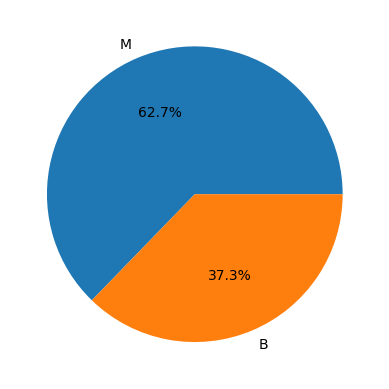

In [11]:
plt.pie(data['diagnosis'].value_counts(),labels=data['diagnosis'].unique(),autopct='%1.1f%%')

In [12]:
data['diagnosis']=data['diagnosis'].replace({'M' : 0 ,'B': 1})

In [13]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: title={'center': 'id'}, xlabel='diagnosis'>

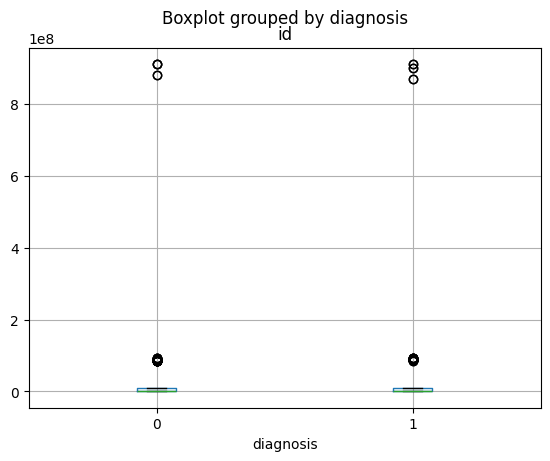

In [14]:
data.boxplot(column='id',by='diagnosis')

<Axes: title={'center': 'radius_mean'}, xlabel='diagnosis'>

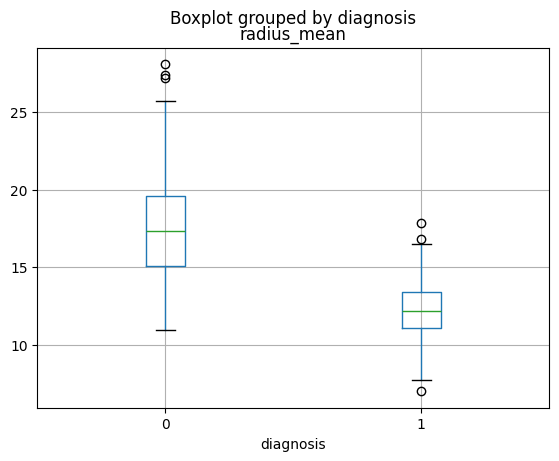

In [15]:
data.boxplot(column='radius_mean',by='diagnosis')

<Axes: title={'center': 'texture_mean'}, xlabel='diagnosis'>

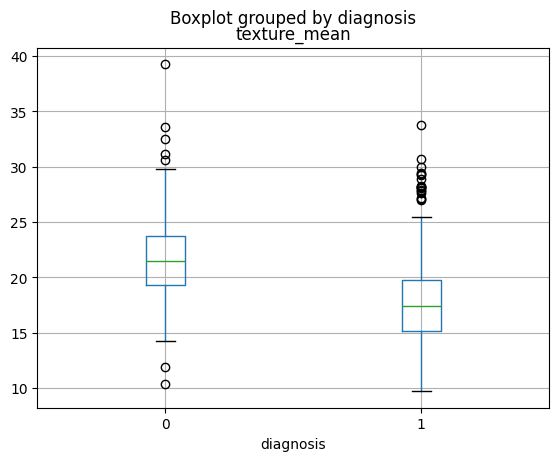

In [16]:
data.boxplot(column='texture_mean',by='diagnosis')

<Axes: title={'center': 'perimeter_mean'}, xlabel='diagnosis'>

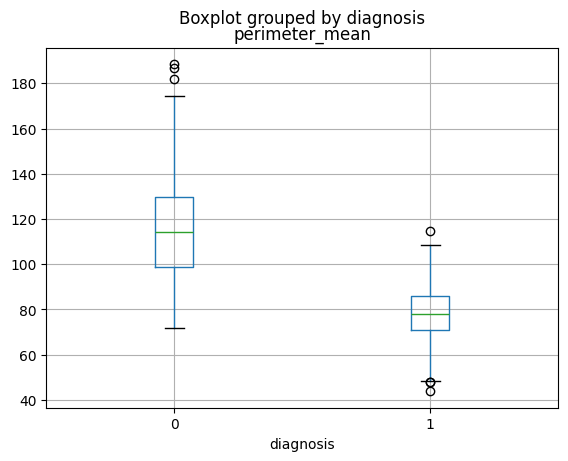

In [17]:
data.boxplot(column='perimeter_mean',by='diagnosis')

<Axes: title={'center': 'smoothness_mean'}, xlabel='diagnosis'>

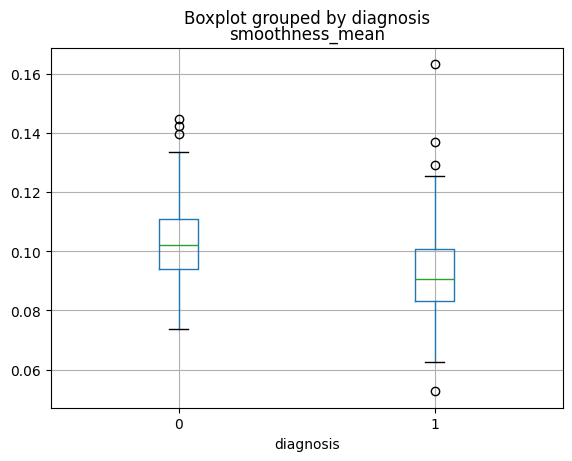

In [18]:
data.boxplot(column='smoothness_mean',by='diagnosis')

<Axes: title={'center': 'area_mean'}, xlabel='diagnosis'>

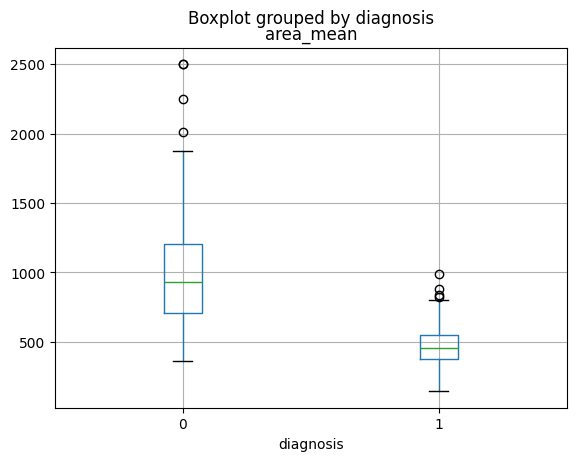

In [19]:
data.boxplot(column='area_mean',by='diagnosis')

<Axes: title={'center': 'compactness_mean'}, xlabel='diagnosis'>

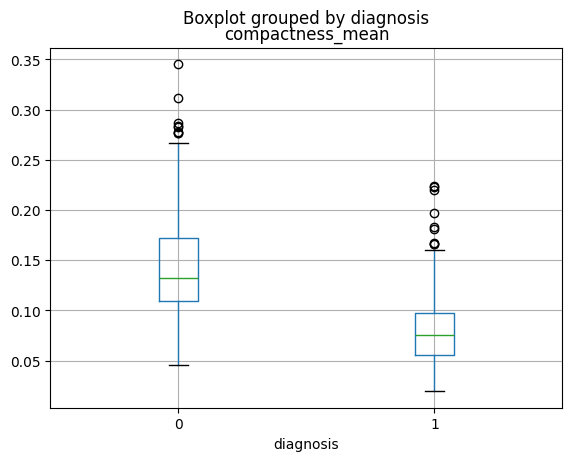

In [20]:
data.boxplot(column='compactness_mean',by='diagnosis')

<Axes: title={'center': 'concavity_mean'}, xlabel='diagnosis'>

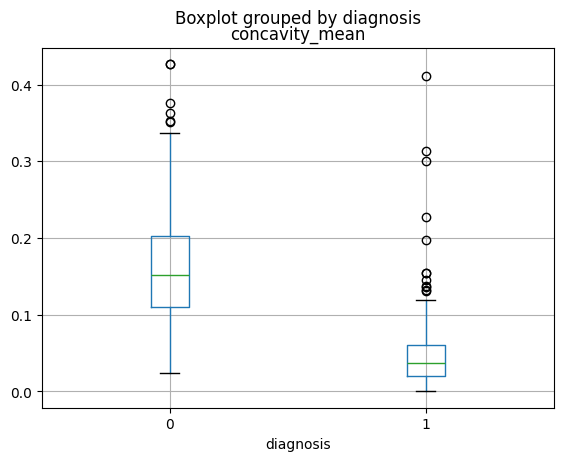

In [21]:
data.boxplot(column='concavity_mean',by='diagnosis')

In [22]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Axes: title={'center': 'concave points_mean'}, xlabel='diagnosis'>

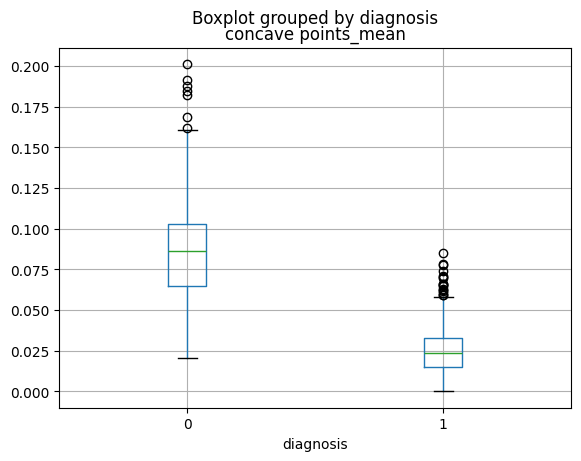

In [23]:
data.boxplot(column='concave points_mean',by='diagnosis')

array([[<Axes: title={'center': 'symmetry_mean'}, xlabel='diagnosis'>,
        <Axes: title={'center': 'fractal_dimension_mean'}, xlabel='diagnosis'>],
       [<Axes: title={'center': 'radius_se'}, xlabel='diagnosis'>,
        <Axes: >]], dtype=object)

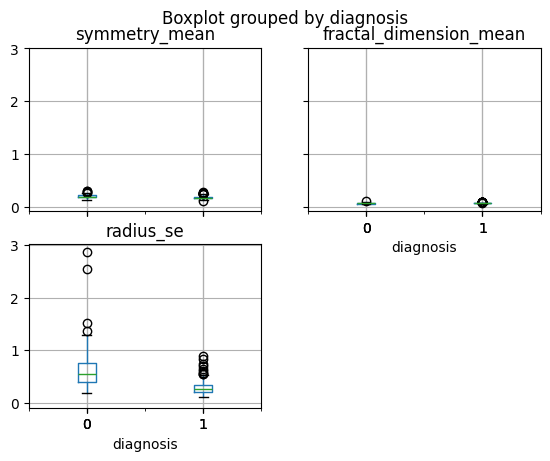

In [24]:
data.boxplot(column=['symmetry_mean', 'fractal_dimension_mean','radius_se'],by='diagnosis')

<Axes: title={'center': 'fractal_dimension_mean'}, xlabel='diagnosis'>

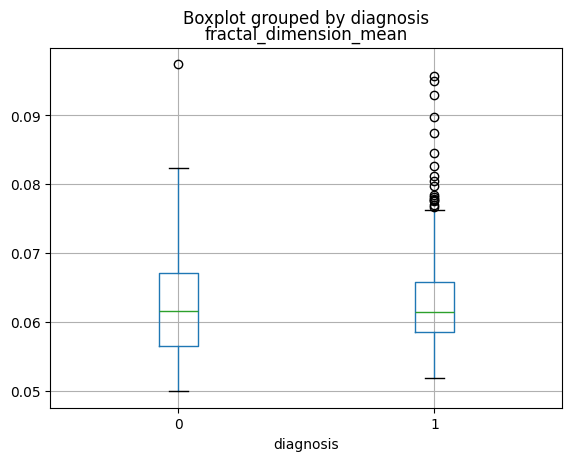

In [25]:
data.boxplot(column='fractal_dimension_mean',by='diagnosis')

array([<Axes: title={'center': 'radius_se'}, xlabel='diagnosis'>,
       <Axes: title={'center': 'texture_se'}, xlabel='diagnosis'>],
      dtype=object)

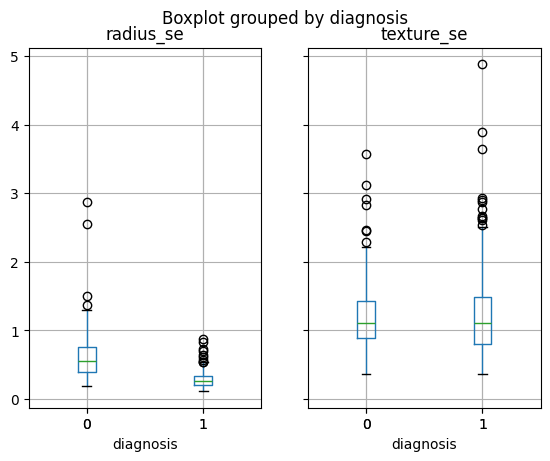

In [26]:
data.boxplot(column=['radius_se', 'texture_se'],by='diagnosis')

array([<Axes: title={'center': 'perimeter_se'}, xlabel='diagnosis'>,
       <Axes: title={'center': 'area_se'}, xlabel='diagnosis'>],
      dtype=object)

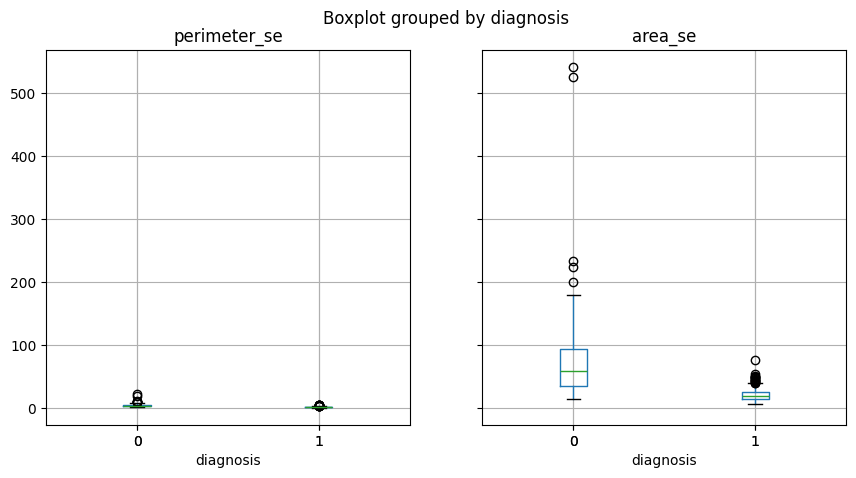

In [27]:
data.boxplot(column=['perimeter_se', 'area_se'],by='diagnosis',figsize=(10,5))

array([[<Axes: title={'center': 'concavity_se'}, xlabel='diagnosis'>,
        <Axes: title={'center': 'concave points_se'}, xlabel='diagnosis'>],
       [<Axes: title={'center': 'symmetry_se'}, xlabel='diagnosis'>,
        <Axes: title={'center': 'fractal_dimension_se'}, xlabel='diagnosis'>]],
      dtype=object)

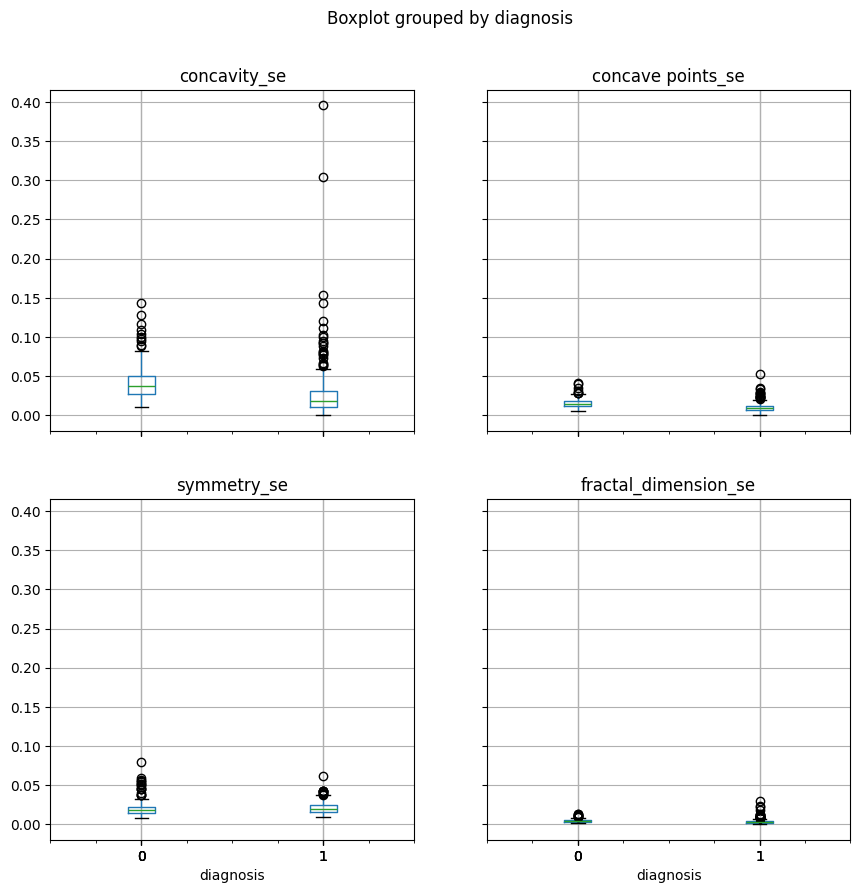

In [28]:
data.boxplot(column=['concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],by='diagnosis', figsize=(10,10))

array([[<Axes: title={'center': 'concavity_se'}, xlabel='diagnosis'>,
        <Axes: title={'center': 'concave points_se'}, xlabel='diagnosis'>],
       [<Axes: title={'center': 'symmetry_se'}, xlabel='diagnosis'>,
        <Axes: title={'center': 'fractal_dimension_se'}, xlabel='diagnosis'>]],
      dtype=object)

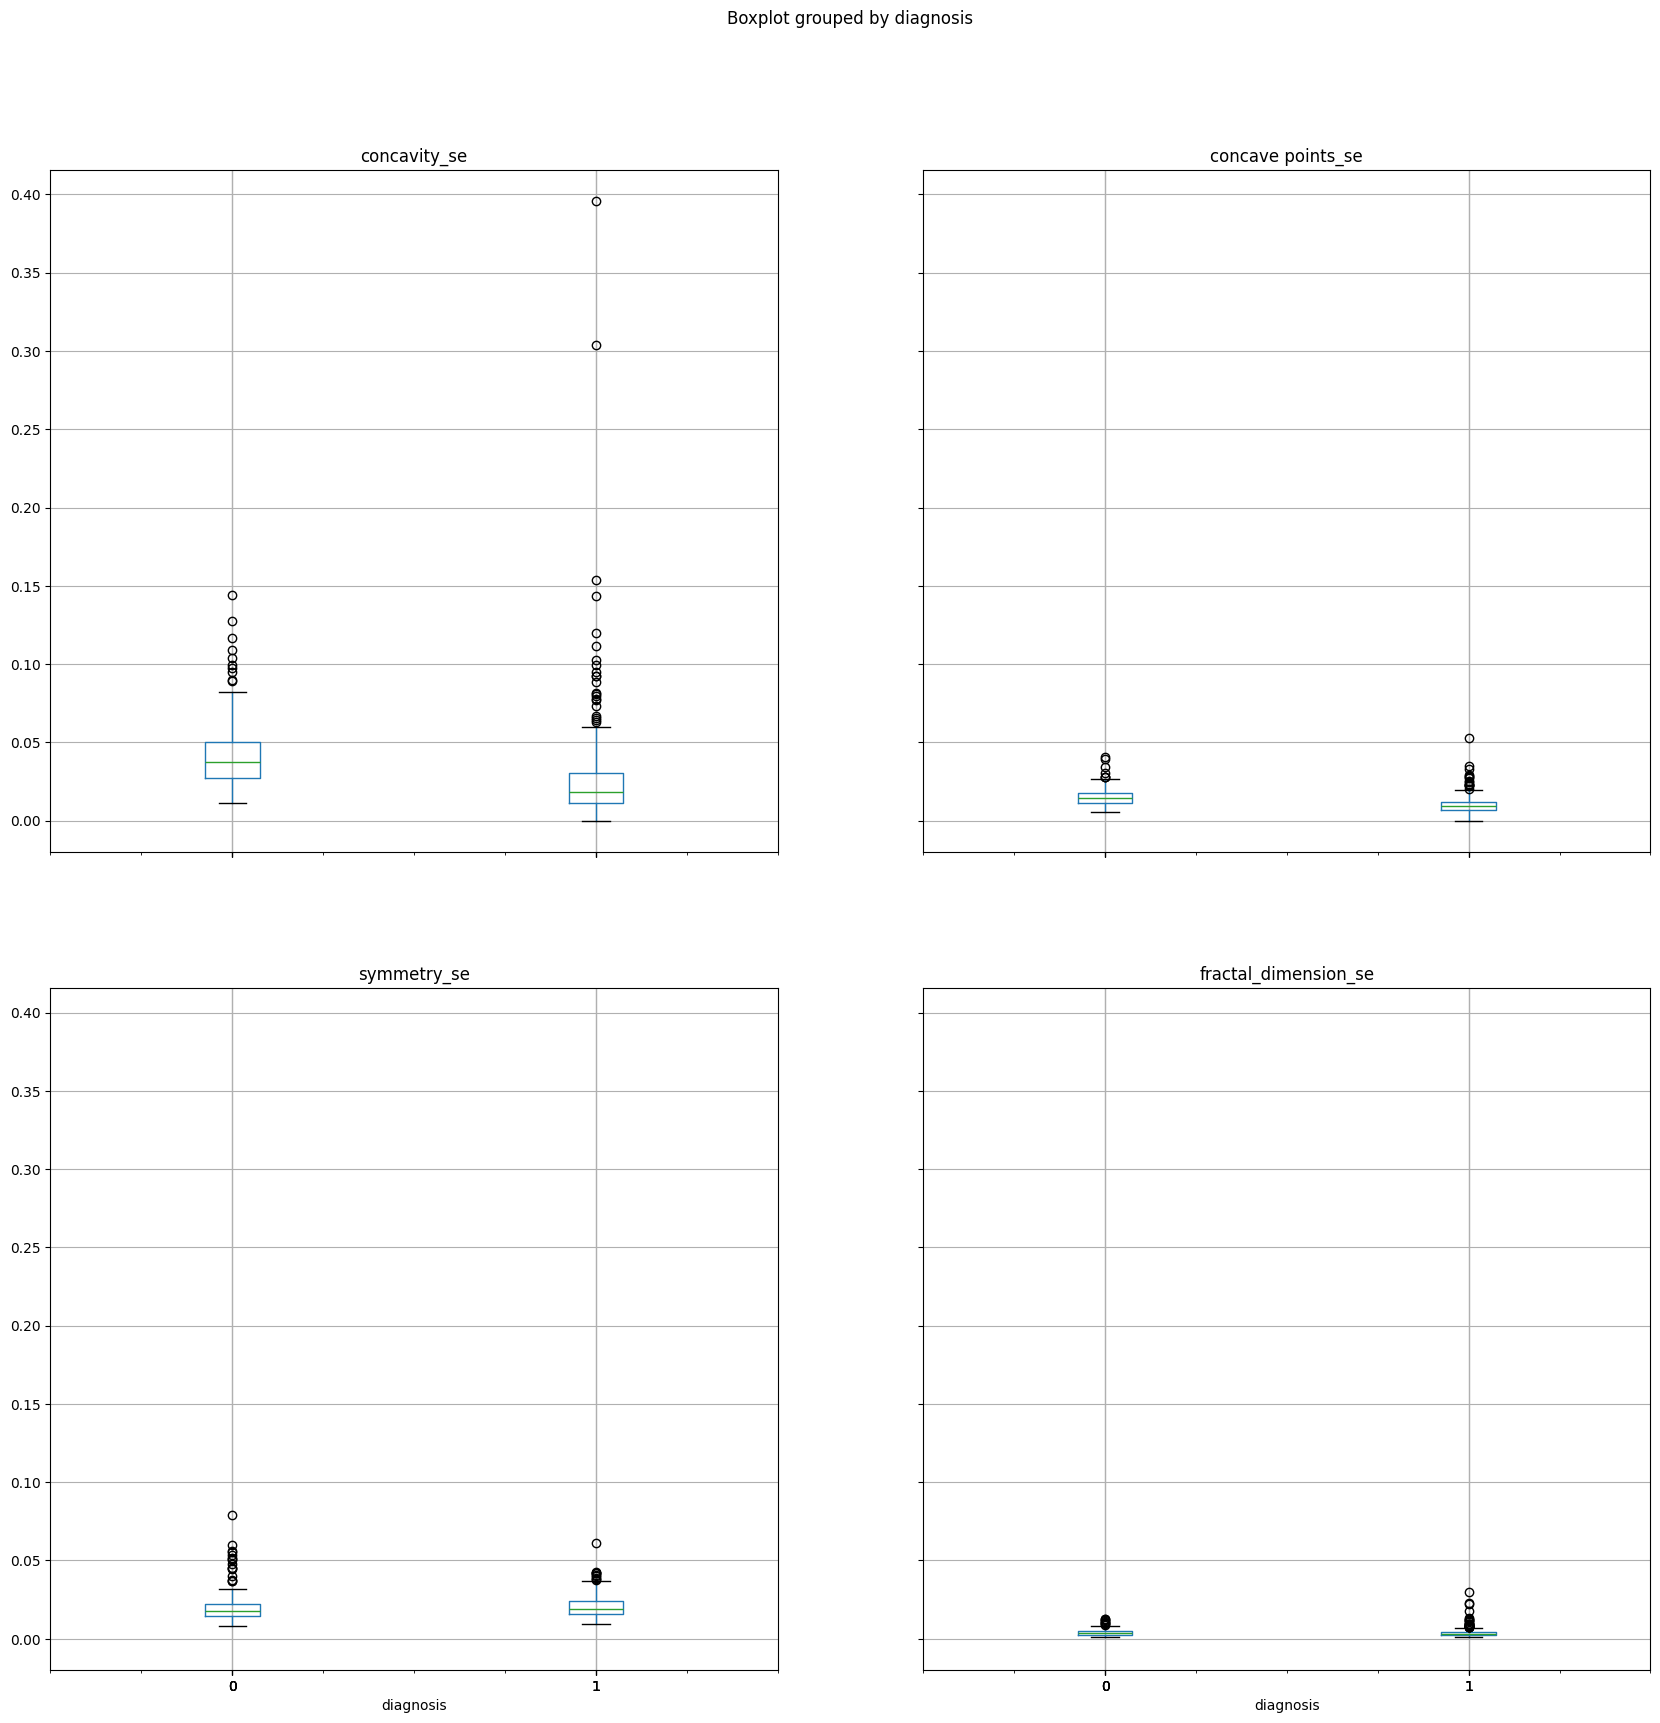

In [29]:
data.boxplot(column=['concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],by='diagnosis', figsize=(20,20))

In [30]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

array([<Axes: title={'center': 'radius_worst'}, xlabel='diagnosis'>,
       <Axes: title={'center': 'texture_worst'}, xlabel='diagnosis'>],
      dtype=object)

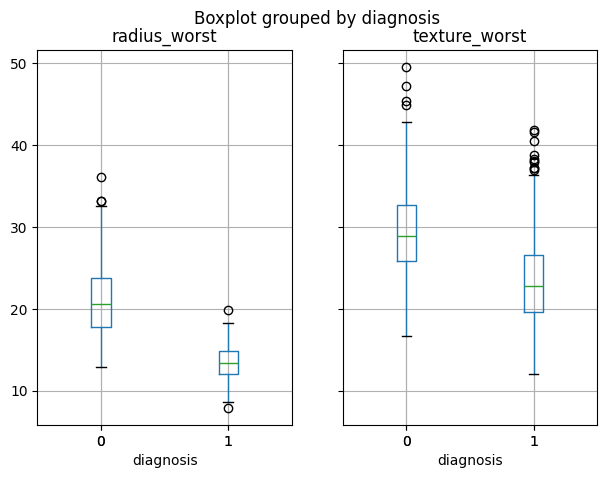

In [31]:
data.boxplot(column=['radius_worst', 'texture_worst',],by='diagnosis', figsize=(7,5))

array([<Axes: title={'center': 'perimeter_worst'}, xlabel='diagnosis'>,
       <Axes: title={'center': 'area_worst'}, xlabel='diagnosis'>],
      dtype=object)

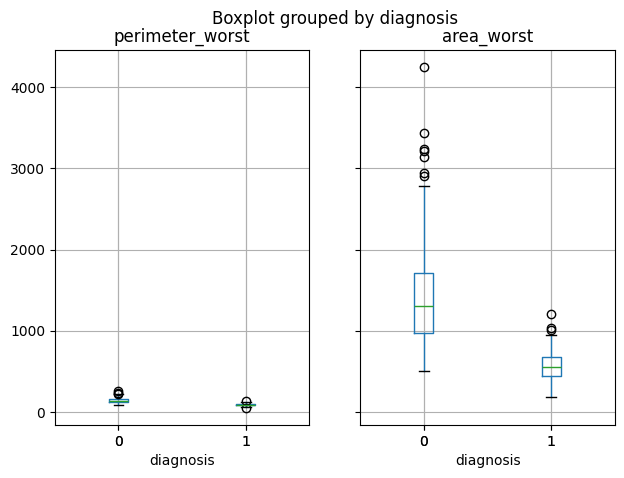

In [32]:
data.boxplot(column=['perimeter_worst', 'area_worst'],by='diagnosis', figsize=(7,5))

array([<Axes: title={'center': 'smoothness_worst'}, xlabel='diagnosis'>,
       <Axes: title={'center': 'compactness_worst'}, xlabel='diagnosis'>],
      dtype=object)

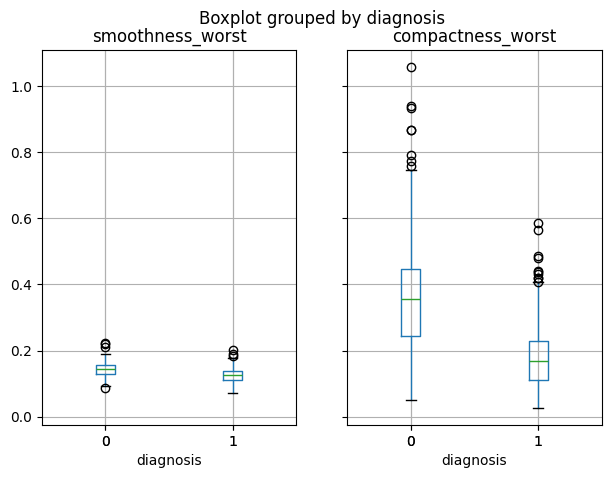

In [33]:
data.boxplot(column=['smoothness_worst',
       'compactness_worst'],by='diagnosis', figsize=(7,5))

array([<Axes: title={'center': 'concavity_worst'}, xlabel='diagnosis'>,
       <Axes: title={'center': 'concave points_worst'}, xlabel='diagnosis'>],
      dtype=object)

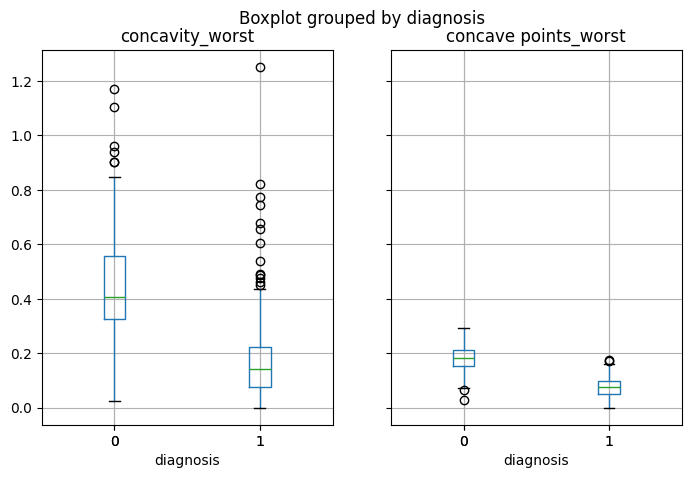

In [34]:
data.boxplot(column=['concavity_worst', 'concave points_worst',
       ],by='diagnosis', figsize=(8,5))

array([<Axes: title={'center': 'symmetry_worst'}, xlabel='diagnosis'>,
       <Axes: title={'center': 'fractal_dimension_worst'}, xlabel='diagnosis'>],
      dtype=object)

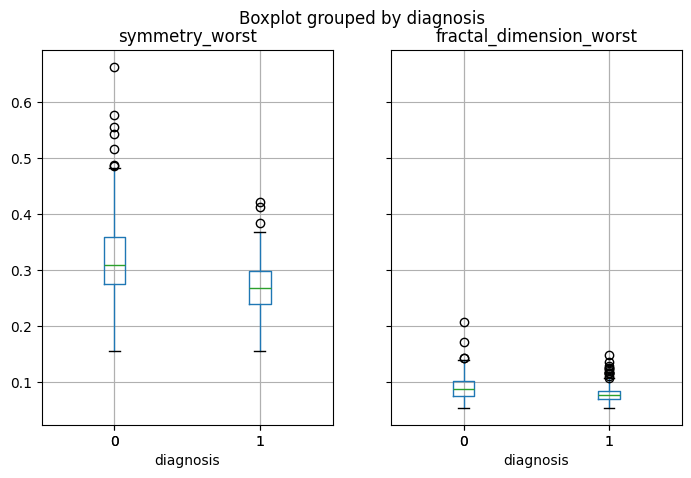

In [35]:
data.boxplot(column=['symmetry_worst', 'fractal_dimension_worst'
       ],by='diagnosis', figsize=(8,5))

these boxplots represtents how each column affects on the patient breast (Benign-Malignant)

we will choose from the column according to it's effect on the patient breast

I will include only the column that has effect on the breast 

so i think id,symmetry_se,fractional_dimension_Se does not have effect

In [36]:
import seaborn as sns

<Axes: >

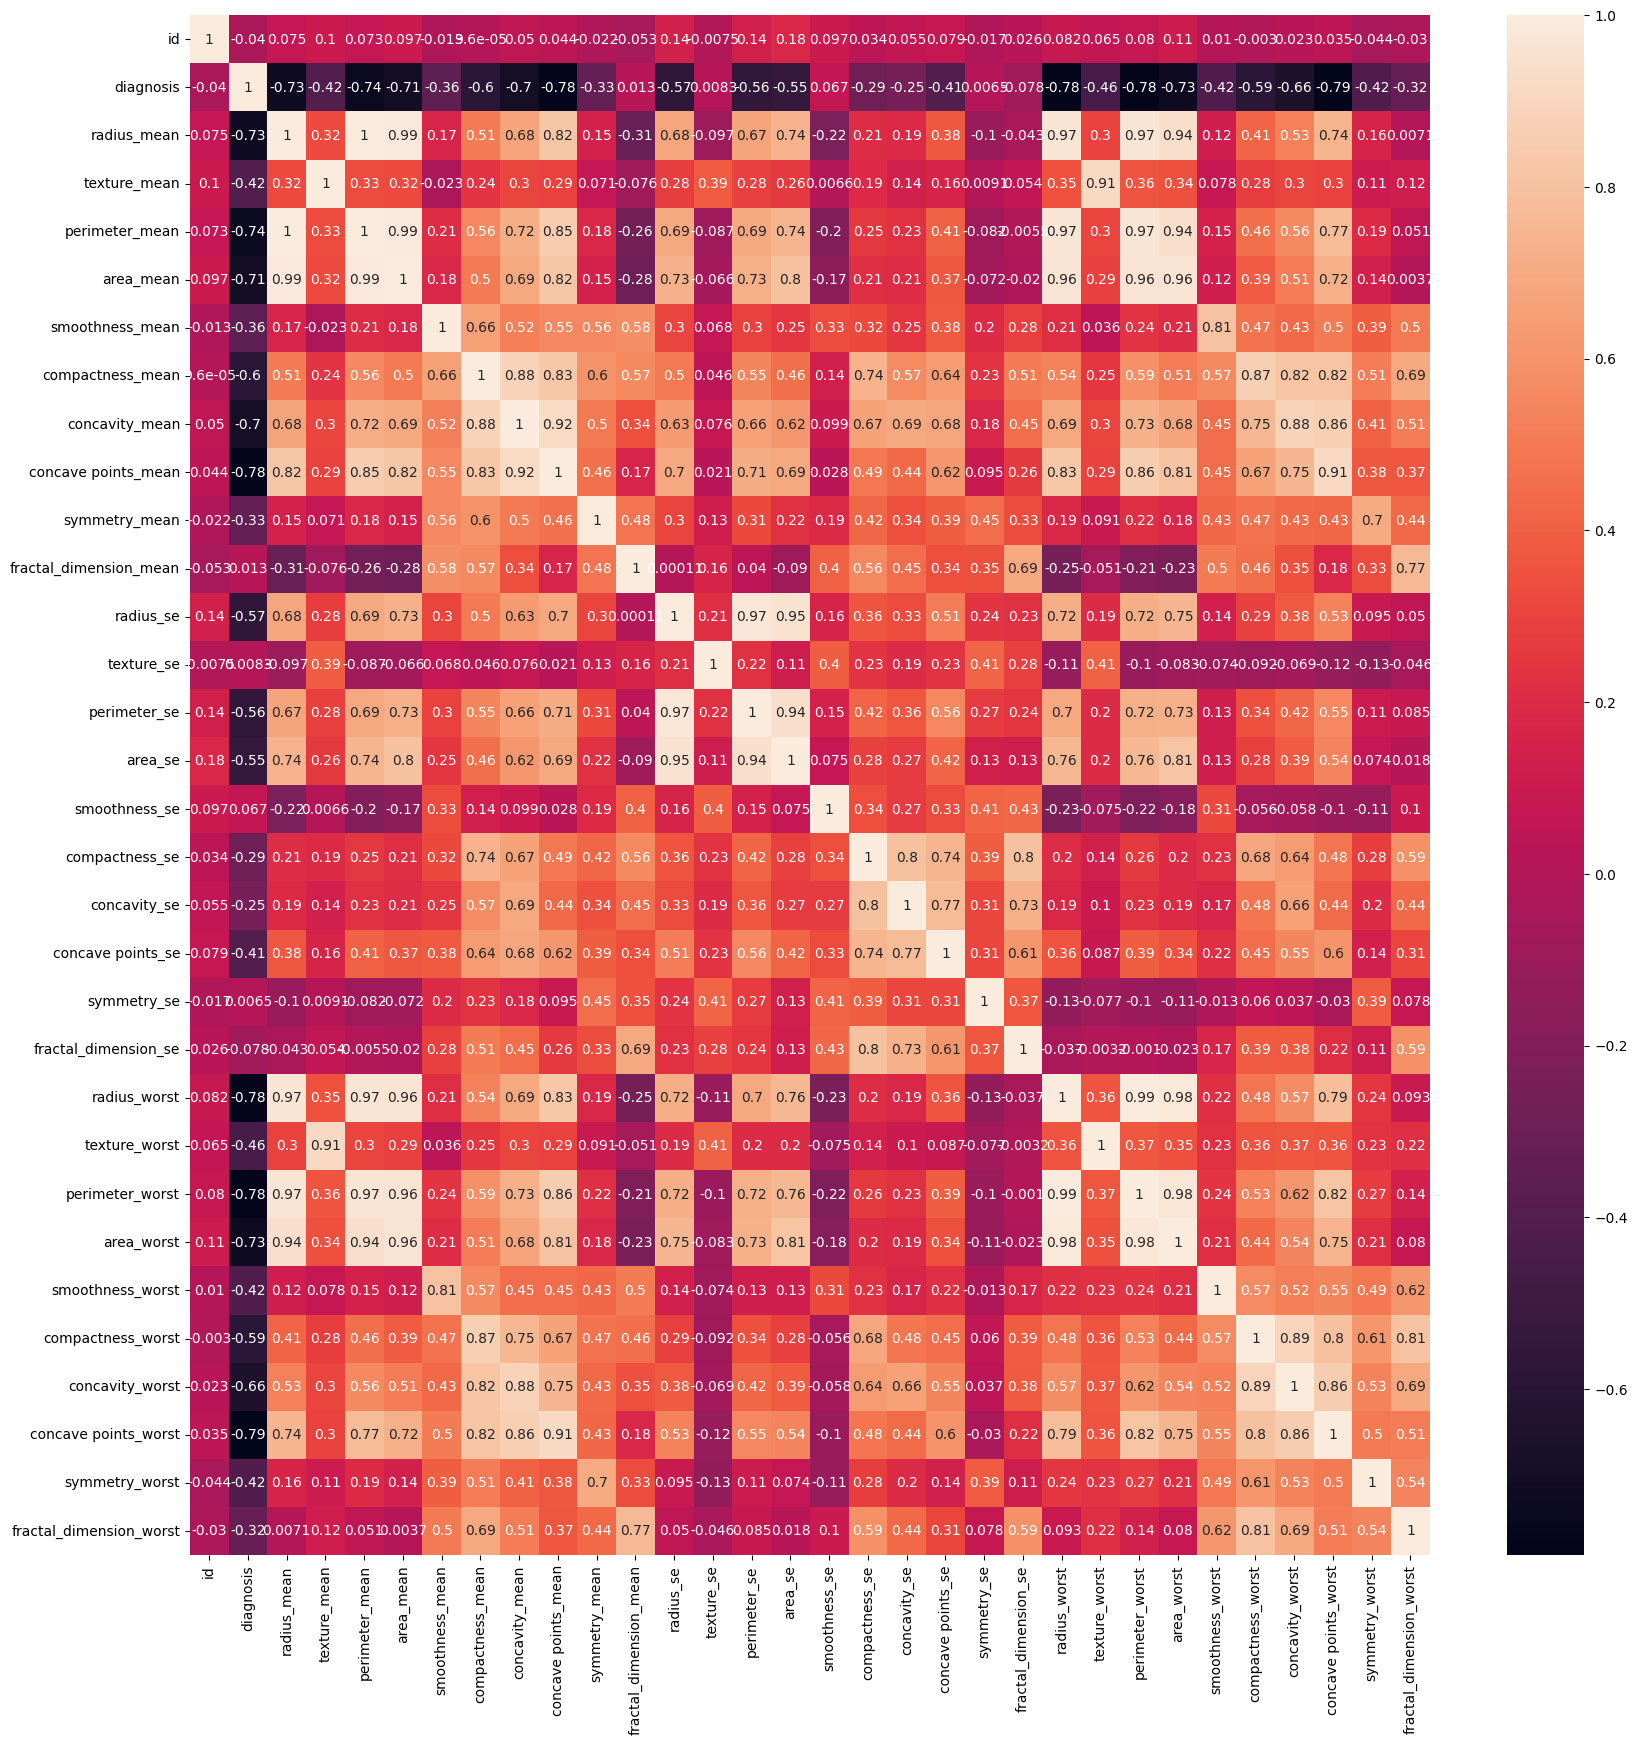

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr() ,annot=True)

the heat map shows also that they do not affect on the diagnosis

split the data

In [38]:
x=data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
y=data[['diagnosis']]
y.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


feature scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaled=MinMaxScaler()
x_scaled=scaled.fit_transform(x)

In [42]:
X=pd.DataFrame(x_scaled,columns=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [43]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [44]:
from sklearn.model_selection import train_test_split 

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [46]:
x_train.shape

(455, 28)

In [47]:
y_train.shape

(455, 1)

In [48]:
x_test.shape

(114, 28)

Deep Learning Model

In [49]:
import tensorflow as tf

In [50]:
from tensorflow.keras.layers import Dense

In [51]:
from tensorflow.keras.models import Sequential

In [52]:
model=Sequential([Dense(units=30,activation='relu'),
                 Dense(units=15,activation='relu') ,
                  Dense(units=1,activation='sigmoid')])

In [53]:
from tensorflow.keras.losses import BinaryCrossentropy

In [73]:
model.compile(loss=BinaryCrossentropy(),metrics=['accuracy'])

In [74]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9945 - loss: 0.0278   
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9880 - loss: 0.0432 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9969 - loss: 0.0238 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9810 - loss: 0.0475 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9932 - loss: 0.0252 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9918 - loss: 0.0374 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9921 - loss: 0.0209 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9859 - loss: 0.0267 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9946 - loss: 0.0260 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9817 - loss: 0.0456 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9871 - loss: 0.0363 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [61]:
model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[8.2255930e-01],
       [1.0789099e-06],
       [6.4087435e-05],
       [9.9999529e-01],
       [9.9999923e-01],
       [7.0832534e-11],
       [5.6225663e-10],
       [1.8714441e-02],
       [4.3275568e-01],
       [9.9997258e-01],
       [9.9246866e-01],
       [2.4479305e-04],
       [9.9966329e-01],
       [4.0493021e-03],
       [9.9987525e-01],
       [1.4633924e-05],
       [9.9997318e-01],
       [9.9999803e-01],
       [9.9999702e-01],
       [1.2655637e-07],
       [9.6801901e-01],
       [9.9855268e-01],
       [1.6099131e-09],
       [9.9998343e-01],
       [9.9996275e-01],
       [9.9999797e-01],
       [9.9995977e-01],
       [9.9975628e-01],
       [9.9991870e-01],
       [2.8822490e-07],
       [9.9997866e-01],
       [9.9998397e-01],
       [9.9958074e-01],
       [9.9987632e-01],
       [9.9997777e-01],
       [9.9908161e-01],
       [2.7395855e-03],
       [9.9953115e-01],
       [7.3716787e-06],
       [9.9239242e-01],
       [9.9999589e-01],
       [1.862006

In [76]:
loss,acc= model.evaluate(x_test, y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9707 - loss: 0.1142 
